# MLSS Midterm Review
Michelle Zhuang
mz3067

# Part A

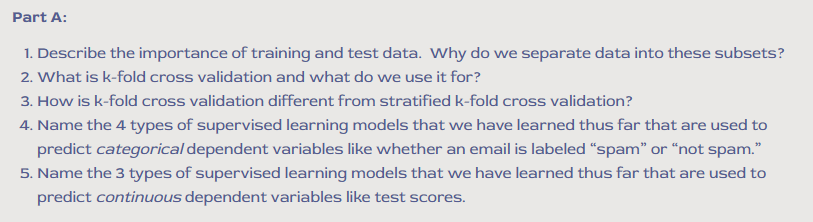

### Q1

**Describe the importance of training and test data.** 
*  The importance of separating data into training and test subsets lies in the need to accurately evaluate the performance of a machine learning model and prevent issues like overfitting. 

**Why do we separate data into these subsets?** 
*  aviod overfitting
   *    If we train and evaluate the model on the same data, the model might "memorize" the data, including noise or irrelevant patterns, rather than learning generalizable relationships. This results in overfitting, where the model performs well on the training data but poorly on new, unseen data.
*  outcome generalization
   * By using a separate test set, we can measure the model's ability to generalize to new data. 

## Q2

**What is k-fold cross validation and what do we use it for?**
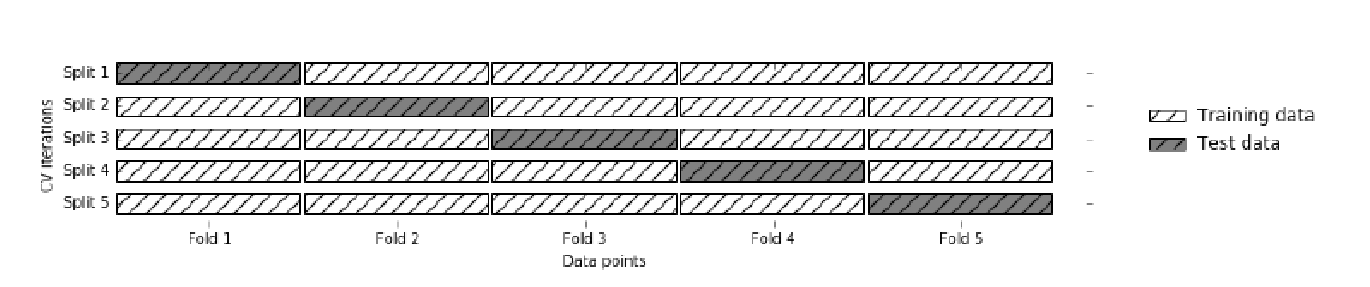
*  K-fold Cross-Validation is when the dataset is split into a K number of folds and is used to evaluate the model's ability when given new data. K refers to the number of groups the data sample is split into.
*  K-fold cross validation use to evaluate the performance of model.

## Q3

**How is k-fold cross validation different from stratified k-fold cross validation?**
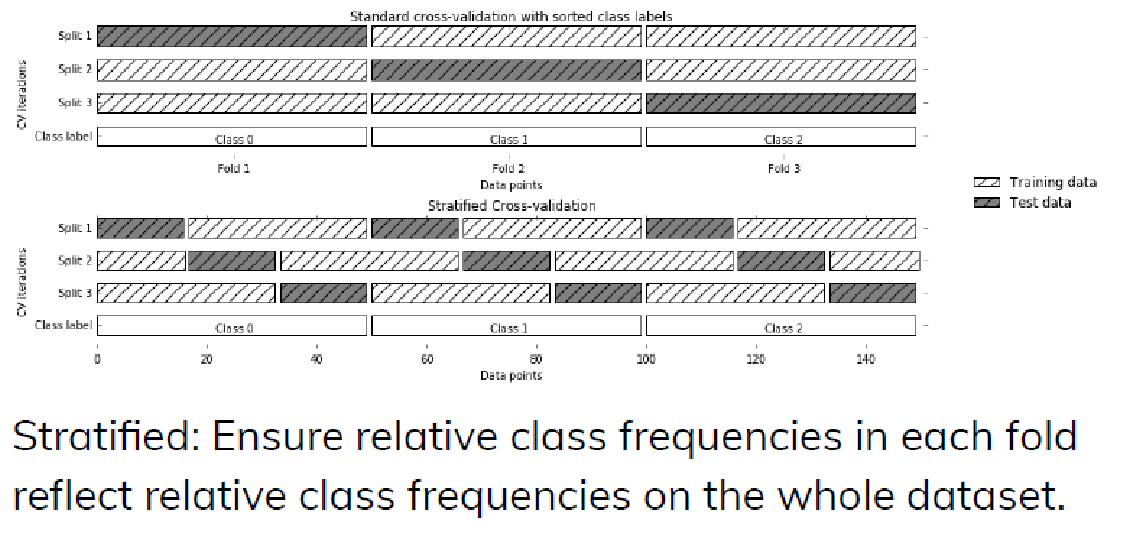

| Feature                     | K-fold Cross-validation              | Stratified K-fold Cross-validation    |
|-----------------------------|--------------------------------------|--------------------------------------|
| **Randomness**              | Randomly splits the data into K folds | Splits data while maintaining class proportions |
| **Class balance**           | No guarantee that each fold will have the same class distribution | Ensures that each fold has the same class distribution as the original dataset |
| **Use case**                | Suitable for balanced datasets | Ideal for imbalanced datasets |

## Q4

**Name the 4 types of supervised learning models that we have learned thus far that are used to predict categorical dependent variables like whether an email is labeled “spam” or “not spam.”**
*  logistic regression
*  decision trees
*  random forest
*  KNN

## Q5

**Name the 3 types of supervised learning models that we have learned thus far that are used to predict continuous dependent variables like test scores.**
*  OLS
*  ridge regression
*  lasso regression

# Part B

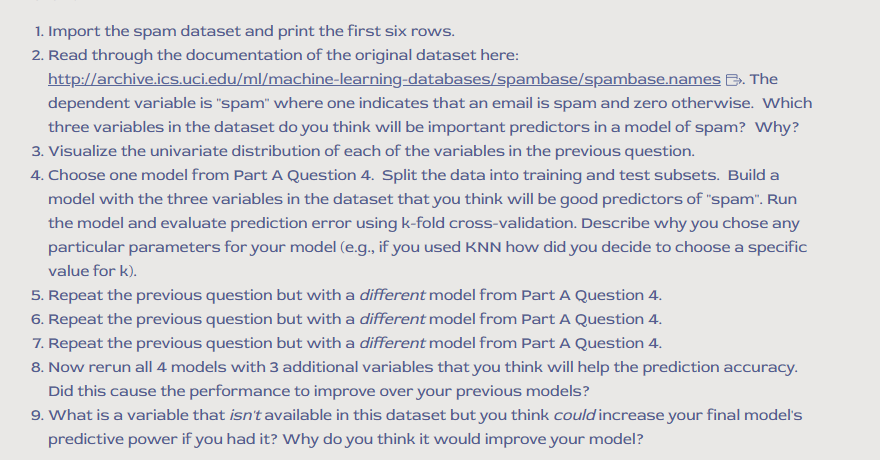

## Q1
**import the spam dataset and print the first six rows**

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import cross validation lib
from sklearn.model_selection import cross_val_score

#knn lib
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# OLS lib
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

#ridge lib
from sklearn.linear_model import Ridge

#lasso lib
from sklearn.linear_model import Lasso

#preprocessing lib
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

#logistic regression lib
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [82]:
spam_path = r'C:\Users\miche\Desktop\GSAS-ZM\fall 2024\MLSS\spam_dataset.csv'

In [83]:
df = pd.read_csv(spam_path)
df.head(6)

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


# Q2
**Read through the documentation of the original dataset here: http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.namesLinks to an external site.. The dependent variable is "spam" where one indicates that an email is spam and zero otherwise.  Which three variables in the dataset do you think will be important predictors in a model of spam?  Why?**

For me, the three variables would be: 
1. word_freq_free
   *  The word "free" is a common indicator of spam, as many spam emails often include this term to entice recipients with free offers, giveaways, or deals. Its frequency in the content of an email is likely to be a significant predictor of whether an email is classified as spam.
3. char_freq_$
   *  The dollar sign is often associated with financial information, offers, or transactions, which are frequently found in spam emails that involve scams or promotions.
5. capital_run_length_average
   *  Spam emails often use capitalized text in an attempt to grab attention, especially in subject lines or key parts of the message. 

## Q3
**Visualize the univariate distribution of each of the variables in the previous question.**

In [84]:
important_predictaors =  ['word_freq_free:', 'char_freq_$:', 'capital_run_length_average:']

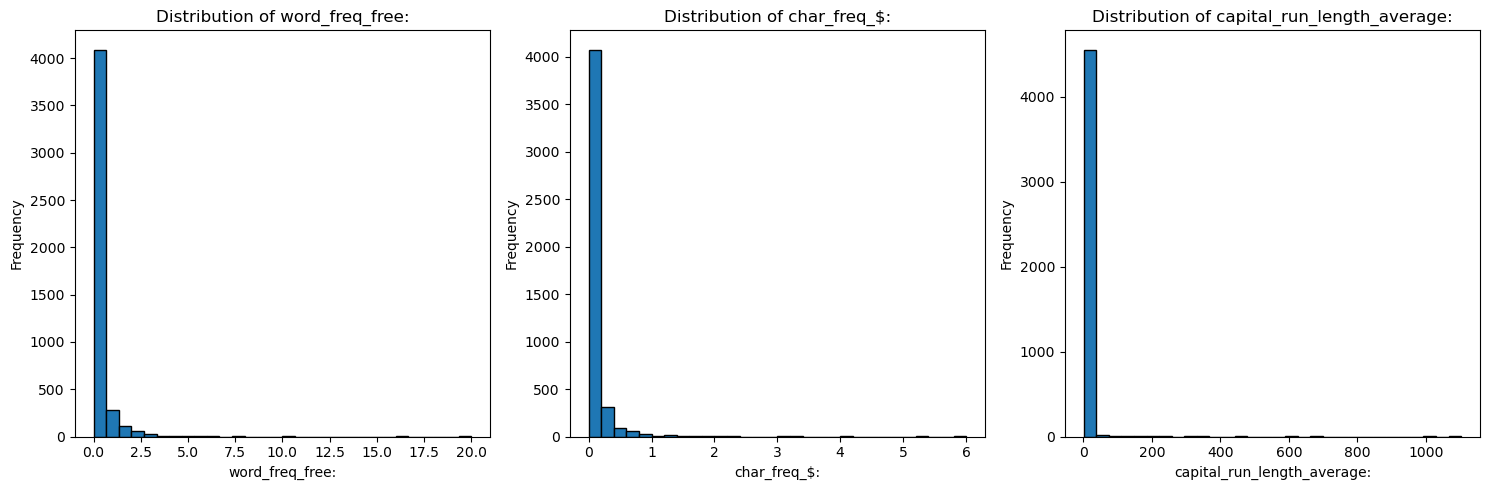

In [85]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(important_predictaors, 1):
    plt.subplot(1, 3, i)
    plt.hist(df[col], bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Q4
**Choose one model from Part A Question 4.  Split the data into training and test subsets.  Build a model with the three variables in the dataset that you think will be good predictors of "spam". Run the model and evaluate prediction error using k-fold cross-validation. Describe why you chose any particular parameters for your model (e.g., if you used KNN how did you decide to choose a specific value for k).**

I choose to run the logistic regression model (logistic model & penalized logistic model)

In [86]:
def run_model(model_obj, X_train, y_train, X_test, y_test, scale=False, param_grid=None):
    if scale:
        scaler = StandardScaler().fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test    
   
    if param_grid is not None:
        grid_search = GridSearchCV(model_obj, param_grid, cv=5, scoring='f1_weighted')
        grid_search.fit(X_train_scaled, y_train)
        best_model = grid_search.best_estimator_
        grid_search_best_score = grid_search.best_score_
        print(f"Best Parameters: {grid_search.best_params_}")
    else:
        best_model = model_obj.fit(X_train_scaled, y_train)
        grid_search_best_score = None
    
    train_pred = best_model.predict(X_train_scaled)
    test_pred = best_model.predict(X_test_scaled)
    
    train_f1 = f1_score(y_train, train_pred, average='weighted')
    test_f1 = f1_score(y_test, test_pred, average='weighted')
    
    cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring="f1_weighted")
    return train_f1, test_f1, np.mean(cv_scores), grid_search_best_score

In [87]:
X = df[important_predictaors]
y = df['spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

In [88]:
# Define the models
models = {
   'Logistic Regression': LogisticRegression(solver='liblinear', random_state=43),
   'Penalized Logistic Regression (L1)': LogisticRegression(solver='liblinear', penalty='l1', random_state=43),
   'Penalized Logistic Regression (L2)': LogisticRegression(solver='liblinear', penalty='l2', random_state=43),
}

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'solver': ['liblinear'],        
}

results_list_log = []

for model_name, model in models.items():
    train_f1, test_f1, cv_mean_f1, grid_search_best_score = run_model(
        model, X_train, y_train, X_test, y_test, scale=True, param_grid=param_grid
    )    
    results_list_log.append({
        "Model": model_name,
        "Training F1 Score": train_f1,
        "Test F1 Score": test_f1,
        "Mean CV F1 Score": cv_mean_f1,
        "Grid Search Best Score": grid_search_best_score
    })

results_df_log = pd.DataFrame(results_list_log)
results_df_log

Best Parameters: {'C': 10, 'solver': 'liblinear'}
Best Parameters: {'C': 10, 'solver': 'liblinear'}
Best Parameters: {'C': 10, 'solver': 'liblinear'}


,Model,Training F1 Score,Test F1 Score,Mean CV F1 Score,Grid Search Best Score
0,Logistic Regression,0.817757,0.816859,0.820713,0.820713
1,Penalized Logistic Regression (L1),0.818188,0.817008,0.820483,0.820483
2,Penalized Logistic Regression (L2),0.817757,0.816859,0.820713,0.820713


## Q5
**Repeat the previous question but with a different model from Part A Question 4. -- using decision tree**

In [92]:
models = {
   'Decision Tree': DecisionTreeClassifier(random_state=43),
   'Pruned Decision Tree (max_depth=3)': DecisionTreeClassifier(max_depth=3, random_state=43),
}

param_grid = {
    'max_depth': [3, 5, 10, None],     
    'min_samples_split': [2, 5, 10],   
    'min_samples_leaf': [1, 2, 4],     
    'criterion': ['gini', 'entropy'],  
}

results_list_tree = []

for model_name, model in models.items():
    train_f1, test_f1, cv_mean_f1, grid_search_best_score = run_model(
        model, X_train, y_train, X_test, y_test, scale=True, param_grid=param_grid
    )    
    results_list_tree.append({
        "Model": model_name,
        "Training F1 Score": train_f1,
        "Test F1 Score": test_f1,
        "Mean CV F1 Score": cv_mean_f1,
        "Grid Search Best Score": grid_search_best_score
    })
results_df_tree = pd.DataFrame(results_list_tree)
results_df_tree

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


,Model,Training F1 Score,Test F1 Score,Mean CV F1 Score,Grid Search Best Score
0,Decision Tree,0.863615,0.848965,0.851341,0.851341
1,Pruned Decision Tree (max_depth=3),0.863615,0.848965,0.851341,0.851341


## Q6
**Repeat the previous question but with a different model from Part A Question 4. -- using random forests**

In [106]:
models = {
   'Random Forest': RandomForestClassifier(random_state=43)
}

param_grid = {
    'n_estimators': [100,200],       
    'max_depth': [None,10,20,30],         
    'min_samples_split': [2,5],    
    'min_samples_leaf': [1,2,4],     
    'criterion': ['gini','entropy'],       
}

results_list_rf = []

In [107]:
from tqdm import tqdm

for model_name, model in tqdm(models.items(), desc="Evaluating models", total=len(models)):
    train_f1, test_f1, cv_mean_f1, grid_search_best_score = run_model(
        model, X_train, y_train, X_test, y_test, scale=True, param_grid=param_grid
    )    
    results_list_rf.append({
        "Model": model_name,
        "Training F1 Score": train_f1,
        "Test F1 Score": test_f1,
        "Mean CV F1 Score": cv_mean_f1,
        "Grid Search Best Score": grid_search_best_score
    })

results_df_rf = pd.DataFrame(results_list_rf)
results_df_rf

Evaluating models:   0%|                                                                         | 0/1 [00:00<?, ?it/s]

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


Evaluating models: 100%|████████████████████████████████████████████████████████████████| 1/1 [01:55<00:00, 115.01s/it]


,Model,Training F1 Score,Test F1 Score,Mean CV F1 Score,Grid Search Best Score
0,Random Forest,0.884596,0.861847,0.861682,0.861682


## Q7
**Repeat the previous question but with a different model from Part A Question 4. -- using KNN**

In [110]:
models = {
    'KNN (default)': KNeighborsClassifier(),
}

param_grid = {
    'n_neighbors': [3, 5, 7, 9],  
}


results_list_knn = []

for model_name, model in tqdm(models.items(), desc="Evaluating models", total=len(models)):
    train_f1, test_f1, cv_mean_f1, grid_search_best_score = run_model(
        model, X_train, y_train, X_test, y_test, scale=True, param_grid=param_grid
    )    
    results_list_knn.append({
        "Model": model_name,
        "Training F1 Score": train_f1,
        "Test F1 Score": test_f1,
        "Mean CV F1 Score": cv_mean_f1,
        "Grid Search Best Score": grid_search_best_score
    })

results_df_knn = pd.DataFrame(results_list_knn)
results_df_knn

Evaluating models: 100%|█████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.01it/s]

Best Parameters: {'n_neighbors': 7}


,Model,Training F1 Score,Test F1 Score,Mean CV F1 Score,Grid Search Best Score
0,KNN (default),0.873516,0.842369,0.851583,0.851583


## Q8
**Now rerun all 4 models with 3 additional variables that you think will help the prediction accuracy. Did this cause the performance to improve over your previous models?**

In [112]:
new_predictors = ['word_freq_free:', 'char_freq_$:', 'capital_run_length_average:', 
                  'word_freq_make:', 'word_freq_credit:', 'capital_run_length_longest:']

X = df[new_predictors]
y = df['spam']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

In [114]:
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=43),
    'Decision Tree': DecisionTreeClassifier(random_state=43),
    'Random Forest': RandomForestClassifier(random_state=43),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [115]:
param_grid_logistic = {
    'C': [0.01, 0.1, 1, 10, 100] 
}
param_grid_decision_tree = {
    'max_depth': [None, 10, 20],      
    'min_samples_split': [2, 5, 10]   
}
param_grid_random_forest = {
    'n_estimators': [100, 200],       
    'max_depth': [None, 10],          
}
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],        
}

In [116]:
param_grids = {
    'Logistic Regression': param_grid_logistic,
    'Decision Tree': param_grid_decision_tree,
    'Random Forest': param_grid_random_forest,
    'K-Nearest Neighbors': param_grid_knn
}

In [117]:
results_list = []

for model_name, model in tqdm(models.items(), desc="Evaluating models", total=len(models)):
    param_grid = param_grids.get(model_name)  
    
    train_f1, test_f1, cv_mean_f1, grid_search_best_score = run_model(
        model, X_train, y_train, X_test, y_test, scale=True, param_grid=param_grid
    )    
    results_list.append({
        "Model": model_name,
        "Training F1 Score": train_f1,
        "Test F1 Score": test_f1,
        "Mean CV F1 Score": cv_mean_f1,
        "Grid Search Best Score": grid_search_best_score
    })

results_df = pd.DataFrame(results_list)
results_df

Evaluating models:   0%|                                                                         | 0/4 [00:00<?, ?it/s]

Best Parameters: {'C': 10}


Evaluating models:  50%|████████████████████████████████▌                                | 2/4 [00:00<00:00,  5.14it/s]

Best Parameters: {'max_depth': 10, 'min_samples_split': 2}
Best Parameters: {'max_depth': None, 'n_estimators': 200}


Evaluating models:  75%|████████████████████████████████████████████████▊                | 3/4 [00:07<00:03,  3.11s/it]

Best Parameters: {'n_neighbors': 3}


Evaluating models: 100%|█████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.08s/it]


,Model,Training F1 Score,Test F1 Score,Mean CV F1 Score,Grid Search Best Score
0,Logistic Regression,0.832491,0.840228,0.832403,0.832403
1,Decision Tree,0.921985,0.851386,0.846044,0.846044
2,Random Forest,0.993038,0.870134,0.866505,0.866505
3,K-Nearest Neighbors,0.912997,0.841404,0.843044,0.843044


## Q9
**What is a variable that isn't available in this dataset but you think could increase your final model's predictive power if you had it? Why do you think it would improve your model?**

Spam Timing Patterns
*  Many spam emails are sent during specific times, particularly during off-hours when users are less likely to be actively monitoring their inboxes. For example, spammers may send emails late at night or very early in the morning to avoid immediate detection or filtering.

Number of Email Recipients
*  Spam emails are often sent to a large number of recipients in bulk, whereas legitimate emails are typically sent to one or a few people. Having access to the number of recipients could help the model differentiate between personal or business communications and mass mailing/spam.